### Import things

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core import display as ICD

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

### Read in CSVs and display first 5 rows

In [2]:
basins = os.listdir('../basin_csvs')

In [3]:
my_basins = basins[1:9]
my_basins

['big_and_little_lost_basins.csv',
 'big_and_little_wood_basins.csv',
 'bitterroot.csv',
 'chelan_entiat_wenatchee.csv',
 'clearwater_and_salmon.csv',
 'columbia_above_methow.csv',
 'deschutes_crooked_john_day.csv',
 'flathead_river_basin.csv']

In [4]:
basins_dict = {}
for basin in my_basins:
    temp = pd.read_csv(f'../basin_csvs/{basin}').drop(['Unnamed: 0', 'lat', 'long'], axis=1)
    temp = temp.drop(temp.columns[-24:], axis=1)
    temp['yyyymmdd'] = pd.to_datetime(temp['yyyymmdd'])
    basins_dict[f'{basin[:-4]}_df'] = temp.set_index('yyyymmdd')

In [5]:
for key in basins_dict:
    print(f'{key}')
    ICD.display(basins_dict[key].head())

big_and_little_lost_basins_df


,station_id,acton_id,station_name,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg
yyyymmdd,,,,,,,,,,
2011-02-10,320,13F03S,Bear Canyon,7900,8.2,9.2,89.0,12.5,11.2,112.0
2011-02-10,524,13E27S,Hilts Creek,8000,9.1,8.4,108.0,9.2,9.0,102.0
2011-02-10,601,14F03S,Lost-Wood Divide,7900,11.7,13.4,87.0,12.1,14.7,82.0
2011-02-10,620,13E18S,Meadow Lake,9150,11.2,10.0,112.0,12.2,11.6,105.0
2011-02-10,636,13E06S,Moonshine,7440,7.8,6.4,122.0,9.9,8.8,112.0


big_and_little_wood_basins_df


,station_id,acton_id,station_name,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg
yyyymmdd,,,,,,,,,,
2011-02-10,382,15F09S,Camas Creek Divide,5710,9.2,9.7,95.0,16.4,12.9,127.0
2011-02-10,895,14F19S,Chocolate Gulch,6310,7.5,9.0,83.0,9.7,11.7,83.0
2011-02-10,450,14F08S,Dollarhide Summit,8420,14.3,14.0,101.0,17.6,18.1,97.0
2011-02-10,489,14F17S,Galena,7470,10.3,11.7,88.0,11.7,13.3,88.0
2011-02-10,490,14F12S,Galena Summit,8780,12.4,12.6,98.0,13.5,14.0,96.0


bitterroot_df


,station_id,acton_id,station_name,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg
yyyymmdd,,,,,,,,,,
2011-02-10,433,13C39S,Daly Creek,5780,8.7,7.0,124.0,11.7,9.7,121.0
2011-02-10,588,14C05S,Lolo Pass,5240,23.2,19.3,120.0,28.2,24.5,115.0
2011-02-10,638,13D16S,Moose Creek,6200,15.6,11.9,131.0,18.4,14.5,127.0
2011-02-10,662,14D02S,Nez Perce Camp,5650,11.3,9.2,123.0,19.7,14.4,137.0
2011-02-10,727,13D22S,Saddle Mtn.,7940,21.6,16.6,130.0,19.9,16.3,122.0


chelan_entiat_wenatchee_df


,station_id,acton_id,station_name,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg
yyyymmdd,,,,,,,,,,
2011-02-10,352,20B02S,Blewett Pass,4240,7.2,12.9,56.0,20.5,22.1,93.0
2011-02-10,606,20A23S,Lyman Lake,5980,37.9,43.0,88.0,44.8,46.7,96.0
2011-02-10,871,15G02S,Wilson Creek,7120,10.7,9.9,108.0,16.6,11.6,143.0
2011-02-10,681,20A12S,Park Creek Ridge,4600,25.5,33.0,77.0,44.4,43.4,102.0
2011-02-10,699,20B24S,Pope Ridge,3590,10.6,14.5,73.0,21.7,22.3,97.0


clearwater_and_salmon_df


,station_id,acton_id,station_name,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg
yyyymmdd,,,,,,,,,,
2011-02-10,312,15E11S,Banner Summit,7040,17.2,16.8,102.0,20.9,21.0,100.0
2011-02-10,318,12E08S,Beagle Springs,8850,7.9,5.5,144.0,8.1,6.8,119.0
2011-02-10,319,16E11S,Bear Basin,5350,11.6,11.5,101.0,17.9,17.2,104.0
2011-02-10,338,15E02S,Big Creek Summit,6560,22.5,22.5,100.0,26.1,24.9,105.0
2011-02-10,370,16D09S,Brundage Reservoir,6250,19.0,18.8,101.0,27.1,25.8,105.0


columbia_above_methow_df


,station_id,acton_id,station_name,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg
yyyymmdd,,,,,,,,,,
2011-02-10,376,17A01S,Bunchgrass Mdw,5000,16.7,19.0,88.0,26.3,25.2,104.0
2011-02-10,515,20A05S,Harts Pass,6490,35.8,29.6,121.0,36.1,21.2,112.0
2011-02-10,644,19A13S,Moses Mtn,5010,8.7,10.6,82.0,10.4,13.1,79.0
2011-02-10,728,19A02S,Salmon Meadows,4460,6.9,6.9,100.0,9.3,10.1,92.0
2012-02-10,376,17A01S,Bunchgrass Mdw,5000,16.4,19.0,86.0,19.6,25.2,78.0


deschutes_crooked_john_day_df


,station_id,acton_id,station_name,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg
yyyymmdd,,,,,,,,,,
2011-02-10,304,19D02S,Arbuckle Mtn,5770,12.4,13.3,93.0,23.5,17.5,134.0
2011-02-10,357,18E16S,Blue Mountain Spring,5870,11.8,11.9,99.0,21.3,17.9,119.0
2011-02-10,388,22F03S,Cascade Summit,5100,24.6,20.9,118.0,41.1,37.8,109.0
2011-02-10,395,21F22S,Chemult Alternate,4850,7.0,8.1,86.0,18.1,15.7,115.0
2011-02-10,440,19E03S,Derr.,5850,10.6,10.7,99.0,17.1,14.8,116.0


flathead_river_basin_df


,station_id,acton_id,station_name,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,prec_wytd_avg,prec_wytd_pctavg
yyyymmdd,,,,,,,,,,
2011-02-10,307,13A15S,Badger Pass,6900,24.7,20.3,122.0,24.4,23.2,105.0
2011-02-10,346,13B25S,Bisson Creek,4920,12.3,6.8,181.0,20.1,11.5,175.0
2011-02-10,469,13A24S,Emery Creek,4350,14.5,10.4,139.0,22.7,17.1,133.0
2011-02-10,482,13A19S,Flattop Mtn.,6300,36.0,29.7,121.0,40.3,33.8,119.0
2011-02-10,500,14A11S,Grave Creek,4300,13.1,11.4,115.0,18.6,22.8,82.0


### Plot the snow water equivalent in each basin

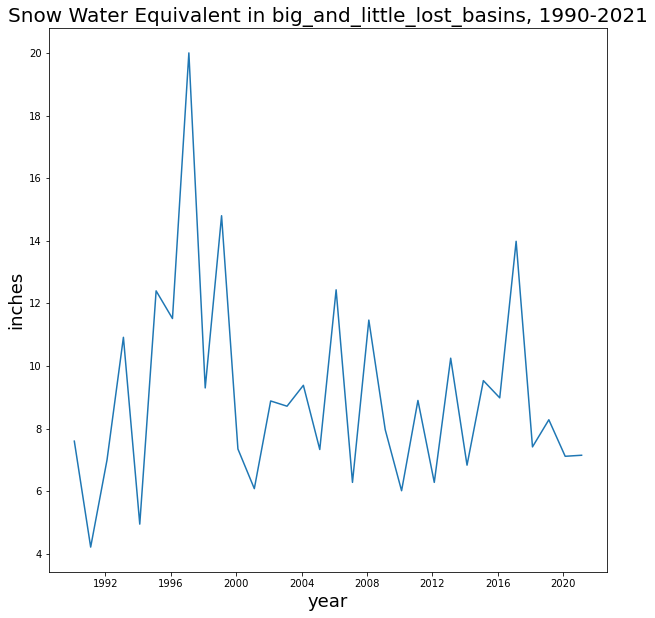

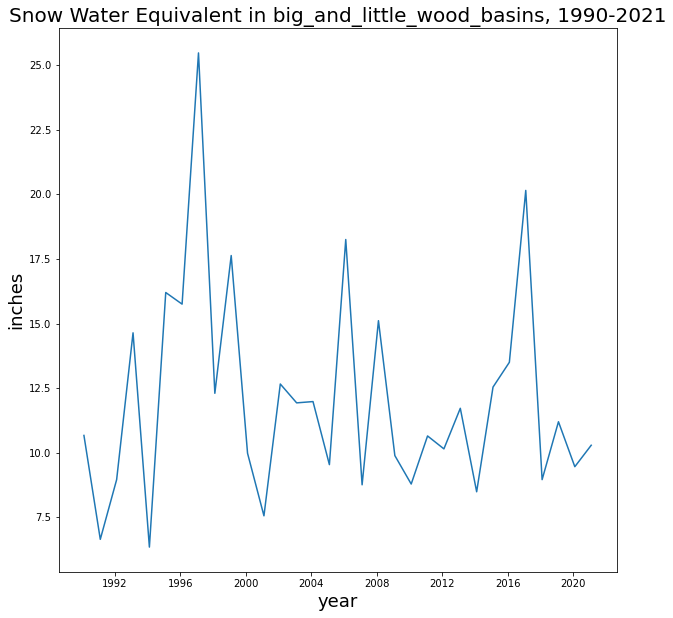

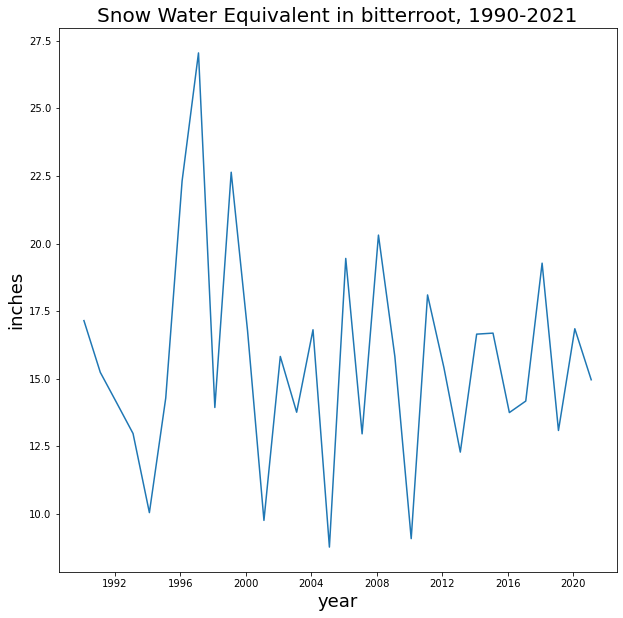

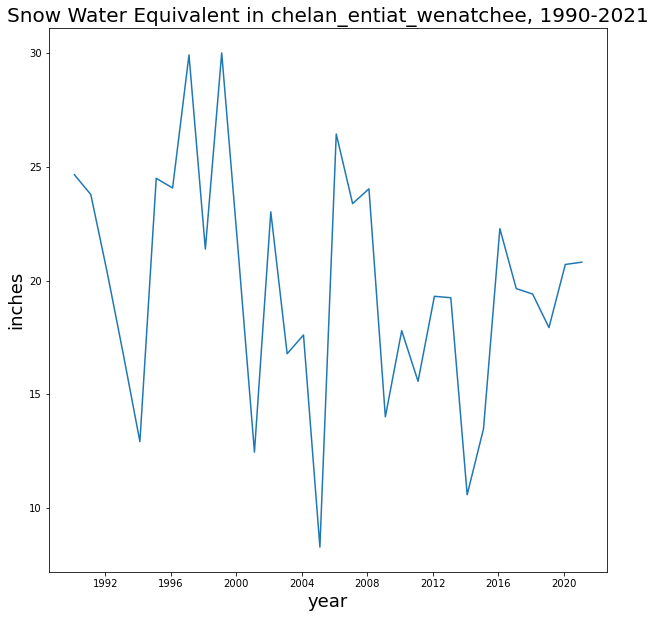

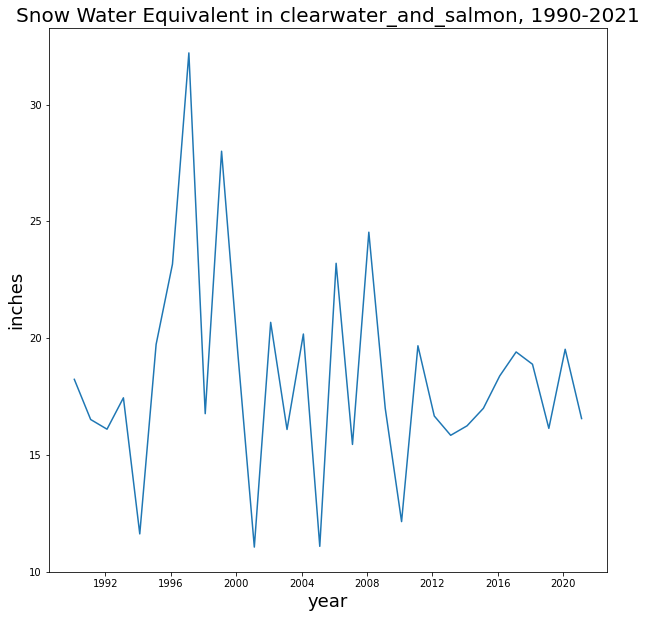

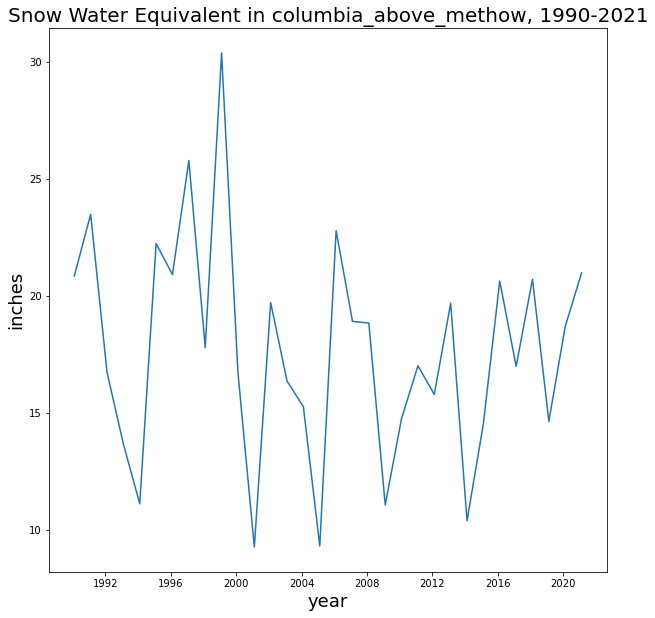

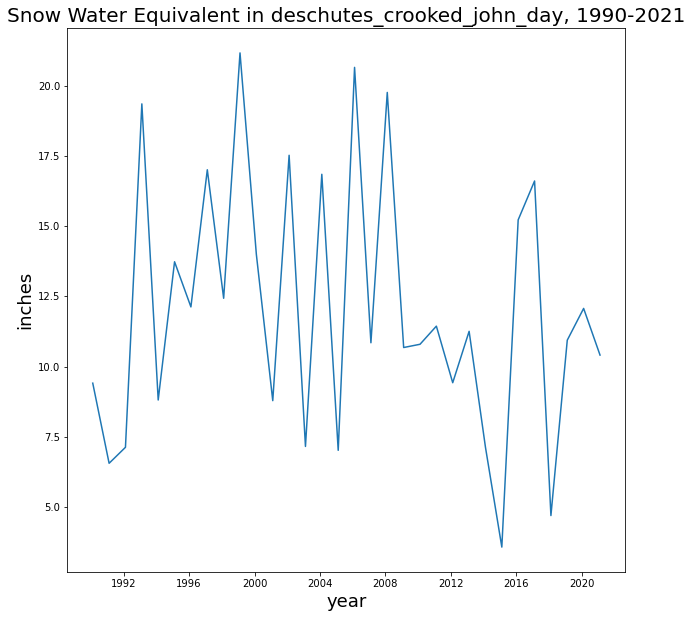

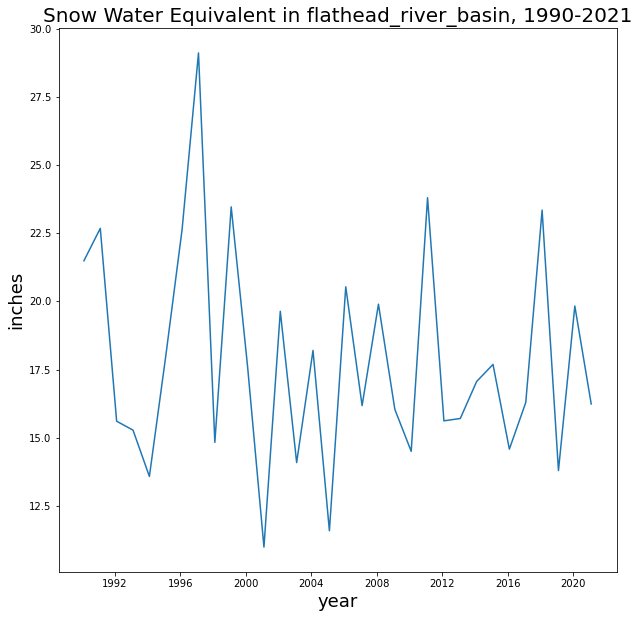

In [6]:
for key in basins_dict:
    plt.figure(figsize=[10,10])
    plt.plot(basins_dict[key].groupby('yyyymmdd').mean()['wteq_amt'])
    plt.title(f'Snow Water Equivalent in {key[:-3]}, 1990-2021', size=20)
    plt.ylabel('inches', size=18)
    plt.xlabel('year', size=18)

### Check for stationarity

In [7]:
for key in basins_dict:
    print(f'{key[:-3]}')
    print(adfuller(basins_dict[key]['wteq_amt']))
    print('  ')

big_and_little_lost_basins
(-1.998553653403602, 0.287207631623958, 12, 179, {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}, 943.2476963483662)
  
big_and_little_wood_basins
(-3.258240262198476, 0.01685150141250422, 14, 305, {'1%': -3.451973573620699, '5%': -2.8710633193086648, '10%': -2.5718441306100512}, 1861.0354361828781)
  
bitterroot
(-1.7705331103041875, 0.39518617171234216, 16, 239, {'1%': -3.458010773719797, '5%': -2.8737103617125186, '10%': -2.5732559963936206}, 1335.2914165708098)
  
chelan_entiat_wenatchee
(-3.191253306057086, 0.02049658753669671, 13, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, 1759.0725952403473)
  
clearwater_and_salmon
(-6.378573825542378, 2.2516986875821534e-08, 17, 1069, {'1%': -3.4364819663568262, '5%': -2.864247479652846, '10%': -2.568211560046239}, 7717.132607501761)
  
columbia_above_methow
(-2.821379533273724, 0.05528415341815862, 7, 120, {'1%': -3.486055829282407, '5%': 

In [8]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [9]:
for key in basins_dict:
    print(f'{key[:-3]}')
    print(interpret_dftest(adfuller(basins_dict[key]['wteq_amt'])))
    print('  ')

big_and_little_lost_basins
Test Statistic   -1.998554
p-value           0.287208
dtype: float64
  
big_and_little_wood_basins
Test Statistic   -3.258240
p-value           0.016852
dtype: float64
  
bitterroot
Test Statistic   -1.770533
p-value           0.395186
dtype: float64
  
chelan_entiat_wenatchee
Test Statistic   -3.191253
p-value           0.020497
dtype: float64
  
clearwater_and_salmon
Test Statistic   -6.378574e+00
p-value           2.251699e-08
dtype: float64
  
columbia_above_methow
Test Statistic   -2.821380
p-value           0.055284
dtype: float64
  
deschutes_crooked_john_day
Test Statistic   -5.619595
p-value           0.000001
dtype: float64
  
flathead_river_basin
Test Statistic   -4.872096
p-value           0.000040
dtype: float64
  


### ARIMA models

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
def arima_model(key): 
    df = basins_dict[key]
    
    #code from sam for basin grouper:
    df = pd.DataFrame(df.groupby('yyyymmdd').mean())
    df = df.asfreq(pd.DateOffset(years=1))
    
    # code modified from ARIMA lesson
    X = df.drop(columns = ['wteq_amt'])
    y = df['wteq_amt']
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
    
    # Starting AIC, p, d, and q.
    best_aic = 99 * (10 ** 16)
    best_p = 0
    best_q = 0
    best_d = 0

    # Use nested for loop to iterate over values of p and q.
    for p in range(5):
        for d in range(5):
            for q in range(5):

                # Insert try and except statements.
                try:
                    # Instantiate ARIMA model.
                    arima = ARIMA(endog=y_train, order=(p, d, q))
                    # Fit ARIMA model.
                    model = arima.fit()
                    # Is my current model's AIC better than our best_aic?
                    if model.aic < best_aic:
                        # If so, let's overwrite best_aic, best_p, and best_q.
                        best_aic = model.aic
                        best_p = p
                        best_d = d
                        best_q = q
                except:
                    pass
    print('MODEL FINISHED!')
    print(f'Our model that minimizes AIC on {key[:-3]}\'s training data is the ARIMA({best_p},{best_d},{best_q}).')
    print(f'This model has an AIC of {best_aic}.')
    print('  ')
    
    # Instantiate best model.
    model = ARIMA(endog=y_train, exog=X_train, order=(best_p, best_d, best_q))
    # Fit ARIMA model.
    arima = model.fit()
    # Generate predictions based on test set.
    preds = arima.predict(start=y_test.index[0], exog = X_test, end = y_test.index[-1])
    
    # Plot data.
    plt.figure(figsize=(10,6))
    plt.plot(y_train.index, pd.DataFrame(y_train), color = 'blue', label='train')
    plt.plot(y_test.index, pd.DataFrame(y_test), color = 'orange', label = 'test')
    plt.plot(y_test.index, preds, color = 'green', label='prediction')
    
    plt.ylabel('inches', size=18)
    plt.xlabel('year', size=18)

    plt.title(f'{key[:-3]} Snow Water Equivalent with ARIMA({best_p},{best_d},{best_q}) Predictions', fontsize=16)
    plt.legend(loc="upper left")
    plt.show();

MODEL FINISHED!
Our model that minimizes AIC on big_and_little_lost_basins's training data is the ARIMA(1,1,0).
This model has an AIC of 127.49412432820918.
  


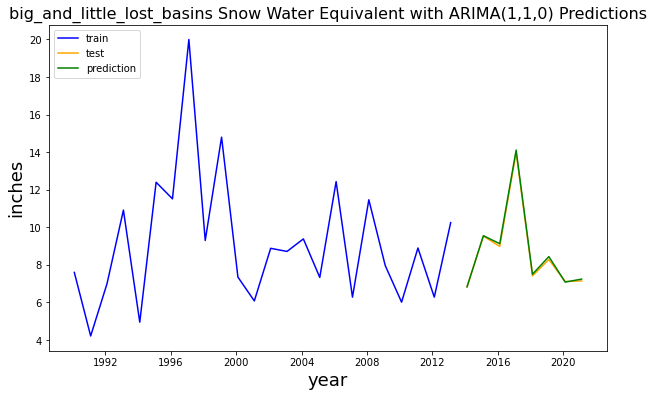

MODEL FINISHED!
Our model that minimizes AIC on big_and_little_wood_basins's training data is the ARIMA(1,1,0).
This model has an AIC of 139.2749339542285.
  


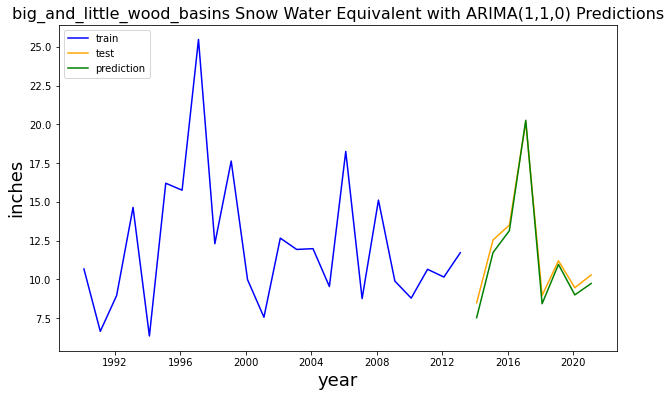

MODEL FINISHED!
Our model that minimizes AIC on bitterroot's training data is the ARIMA(0,1,1).
This model has an AIC of 141.51269072514984.
  


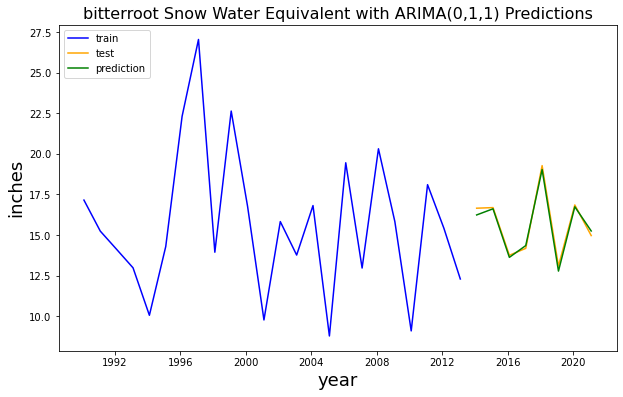

MODEL FINISHED!
Our model that minimizes AIC on chelan_entiat_wenatchee's training data is the ARIMA(4,4,4).
This model has an AIC of 18.0.
  


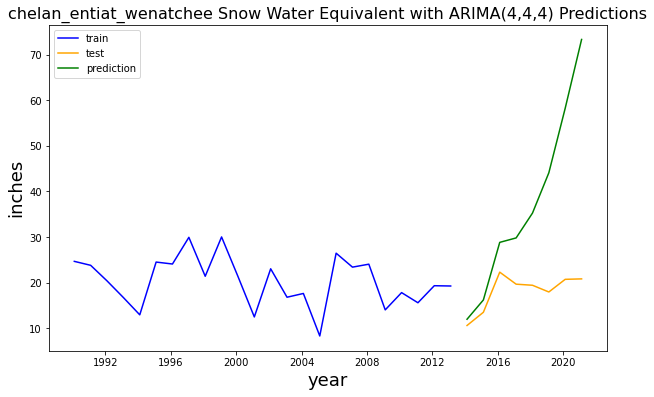

MODEL FINISHED!
Our model that minimizes AIC on clearwater_and_salmon's training data is the ARIMA(0,1,1).
This model has an AIC of 147.84557119942264.
  


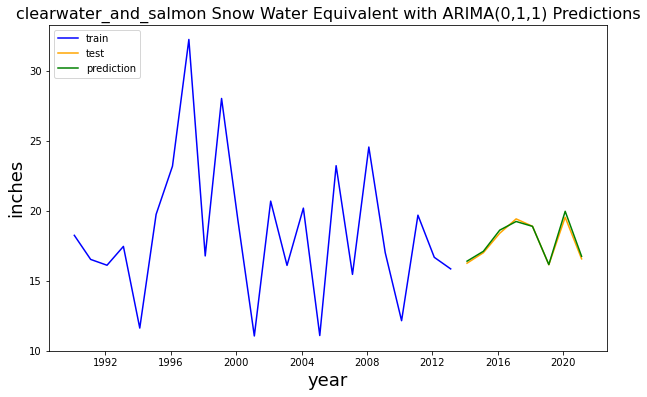

MODEL FINISHED!
Our model that minimizes AIC on columbia_above_methow's training data is the ARIMA(0,1,1).
This model has an AIC of 147.61779206748088.
  


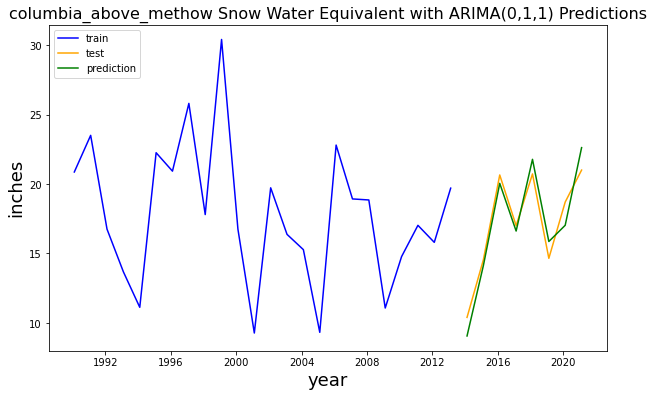

MODEL FINISHED!
Our model that minimizes AIC on deschutes_crooked_john_day's training data is the ARIMA(1,1,0).
This model has an AIC of 139.94387097871257.
  


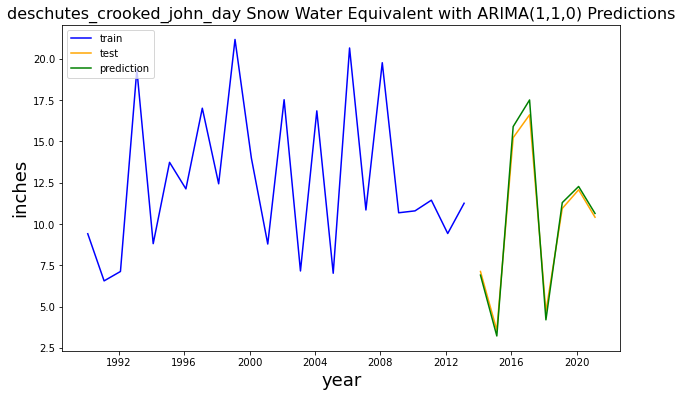

MODEL FINISHED!
Our model that minimizes AIC on flathead_river_basin's training data is the ARIMA(4,4,4).
This model has an AIC of 18.0.
  


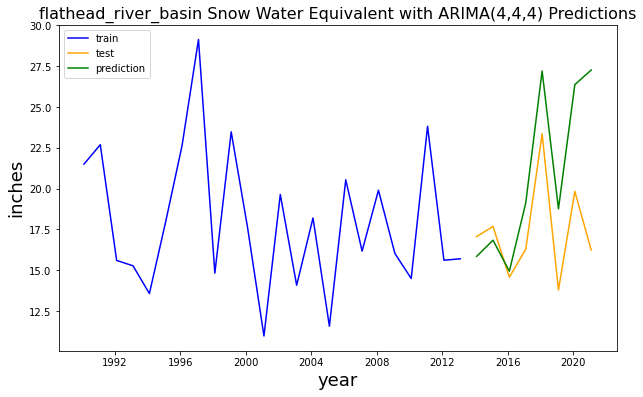

In [12]:
for key in basins_dict:
    arima_model(key)

### Make some future dates

In [13]:
future_df = pd.DataFrame()

In [14]:
base = 20220210
dates = [base + 10000*x for x in range(1, 10)]

In [15]:
future_df['yyyymmdd'] = dates

In [16]:
future_df['yyyymmdd'] = pd.to_datetime(future_df['yyyymmdd'], format='%Y%m%d')

In [17]:
future_df.set_index('yyyymmdd', inplace=True)

In [18]:
future_df.index

DatetimeIndex(['2023-02-10', '2024-02-10', '2025-02-10', '2026-02-10',
               '2027-02-10', '2028-02-10', '2029-02-10', '2030-02-10',
               '2031-02-10'],
              dtype='datetime64[ns]', name='yyyymmdd', freq=None)

### Make future predictions

In [23]:
def future_preds(key): 
    df = basins_dict[key]
    
    #code from sam for basin grouper:
    df = pd.DataFrame(df.groupby('yyyymmdd').mean())
    df = df.asfreq(pd.DateOffset(years=1))
    
    # code modified from ARIMA lesson
    X = df.drop(columns = ['wteq_amt'])
    y = df['wteq_amt']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 9, shuffle = False)
    
    # Starting AIC, p, d, and q.
    best_aic = 99 * (10 ** 16)
    best_p = 0
    best_q = 0
    best_d = 0

    # Use nested for loop to iterate over values of p and q.
    for p in range(5):
        for d in range(5):
            for q in range(5):

                # Insert try and except statements.
                try:
                    # Instantiate ARIMA model.
                    arima = ARIMA(endog=y_train, order=(p, d, q))
                    # Fit ARIMA model.
                    model = arima.fit()
                    # Is my current model's AIC better than our best_aic?
                    if model.aic < best_aic:
                        # If so, let's overwrite best_aic, best_p, and best_q.
                        best_aic = model.aic
                        best_p = p
                        best_d = d
                        best_q = q
                except:
                    pass
    print('MODEL FINISHED!')
    print(f'Our model that minimizes AIC on {key[:-3]}\'s training data is the ARIMA({best_p},{best_d},{best_q}).')
    print(f'This model has an AIC of {best_aic}.')
    print('  ')
    
    # Instantiate best model.
    model = ARIMA(endog=y_train, exog=X_train, order=(best_p, best_d, best_q))
    # Fit ARIMA model.
    arima = model.fit()
    # Generate predictions based on test set.
    preds = arima.predict(start=y_test.index[0], exog = X_test, end = y_test.index[-1])
    # one-step out-of sample forecast
    forecast = arima.forecast(steps=9, exog=X_test)
    
    # Plot data.
    plt.figure(figsize=(10,6))
    plt.plot(y_train.index, pd.DataFrame(y_train), color = 'blue', label='train')
    plt.plot(y_test.index, pd.DataFrame(y_test), color = 'orange', label = 'test')
    plt.plot(y_test.index, preds, color = 'green', label='prediction')
    
    plt.ylabel('inches', size=18)
    plt.xlabel('year', size=18)

    plt.title(f'{key[:-3]} Snow Water Equivalent with ARIMA({best_p},{best_d},{best_q}) Predictions', fontsize=16)
    plt.legend(loc="upper left")
    plt.show();
    print(forecast)
    print(preds)

MODEL FINISHED!
Our model that minimizes AIC on big_and_little_lost_basins's training data is the ARIMA(4,3,4).
This model has an AIC of 18.0.
  


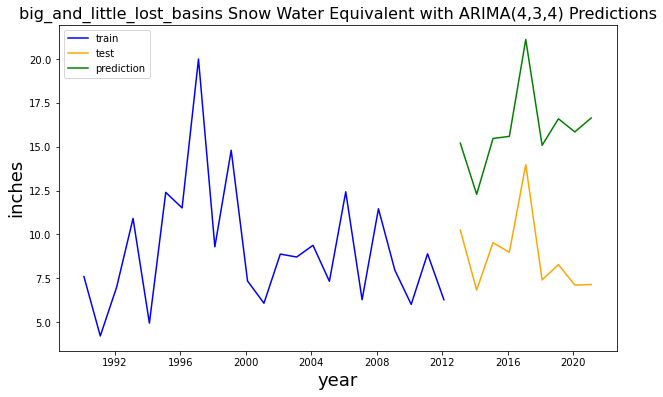

2013-02-10    15.203983
2014-02-10    12.289644
2015-02-10    15.471352
2016-02-10    15.594721
2017-02-10    21.115529
2018-02-10    15.083806
2019-02-10    16.595645
2020-02-10    15.845641
2021-02-10    16.641526
Freq: <DateOffset: years=1>, Name: predicted_mean, dtype: float64
2013-02-10    15.203983
2014-02-10    12.289644
2015-02-10    15.471352
2016-02-10    15.594721
2017-02-10    21.115529
2018-02-10    15.083806
2019-02-10    16.595645
2020-02-10    15.845641
2021-02-10    16.641526
Freq: <DateOffset: years=1>, Name: predicted_mean, dtype: float64
MODEL FINISHED!
Our model that minimizes AIC on big_and_little_wood_basins's training data is the ARIMA(4,3,4).
This model has an AIC of 18.0.
  


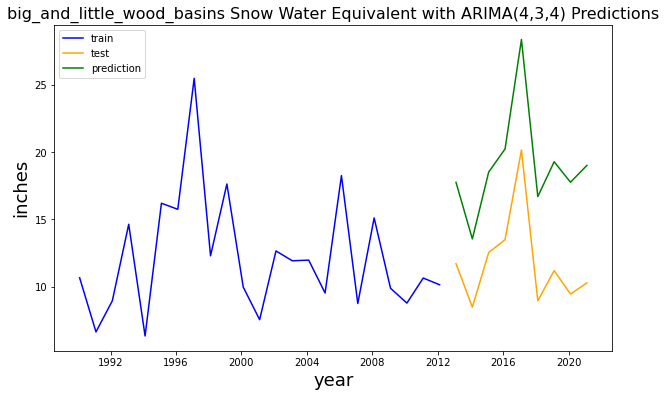

2013-02-10    17.753204
2014-02-10    13.554124
2015-02-10    18.516063
2016-02-10    20.227443
2017-02-10    28.354732
2018-02-10    16.692838
2019-02-10    19.280060
2020-02-10    17.757886
2021-02-10    19.009005
Freq: <DateOffset: years=1>, Name: predicted_mean, dtype: float64
2013-02-10    17.753204
2014-02-10    13.554124
2015-02-10    18.516063
2016-02-10    20.227443
2017-02-10    28.354732
2018-02-10    16.692838
2019-02-10    19.280060
2020-02-10    17.757886
2021-02-10    19.009005
Freq: <DateOffset: years=1>, Name: predicted_mean, dtype: float64
MODEL FINISHED!
Our model that minimizes AIC on bitterroot's training data is the ARIMA(0,1,1).
This model has an AIC of 136.04979880813477.
  


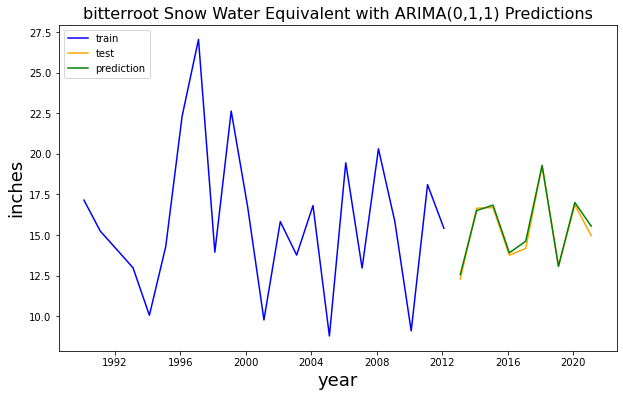

2013-02-10    12.564273
2014-02-10    16.504102
2015-02-10    16.839364
2016-02-10    13.899868
2017-02-10    14.620291
2018-02-10    19.283932
2019-02-10    13.063326
2020-02-10    17.001469
2021-02-10    15.542579
Freq: <DateOffset: years=1>, Name: predicted_mean, dtype: float64
2013-02-10    12.564273
2014-02-10    16.504102
2015-02-10    16.839364
2016-02-10    13.899868
2017-02-10    14.620291
2018-02-10    19.283932
2019-02-10    13.063326
2020-02-10    17.001469
2021-02-10    15.542579
Freq: <DateOffset: years=1>, Name: predicted_mean, dtype: float64
MODEL FINISHED!
Our model that minimizes AIC on chelan_entiat_wenatchee's training data is the ARIMA(4,3,4).
This model has an AIC of 18.0.
  


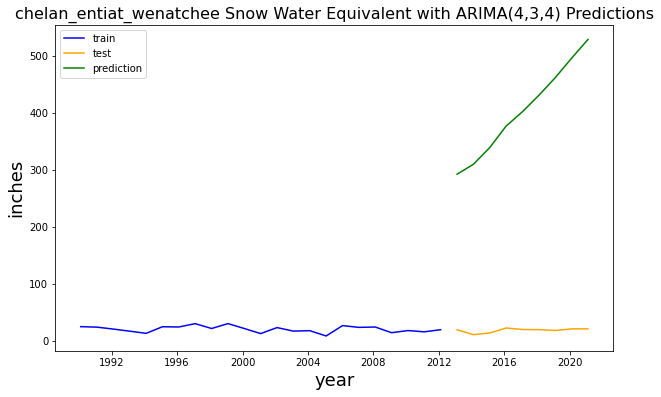

2013-02-10    292.272707
2014-02-10    309.704432
2015-02-10    339.071495
2016-02-10    376.720105
2017-02-10    402.055234
2018-02-10    430.818251
2019-02-10    461.672472
2020-02-10    495.859945
2021-02-10    528.814424
Freq: <DateOffset: years=1>, Name: predicted_mean, dtype: float64
2013-02-10    292.272707
2014-02-10    309.704432
2015-02-10    339.071495
2016-02-10    376.720105
2017-02-10    402.055234
2018-02-10    430.818251
2019-02-10    461.672472
2020-02-10    495.859945
2021-02-10    528.814424
Freq: <DateOffset: years=1>, Name: predicted_mean, dtype: float64
MODEL FINISHED!
Our model that minimizes AIC on clearwater_and_salmon's training data is the ARIMA(0,1,1).
This model has an AIC of 142.4078431603804.
  


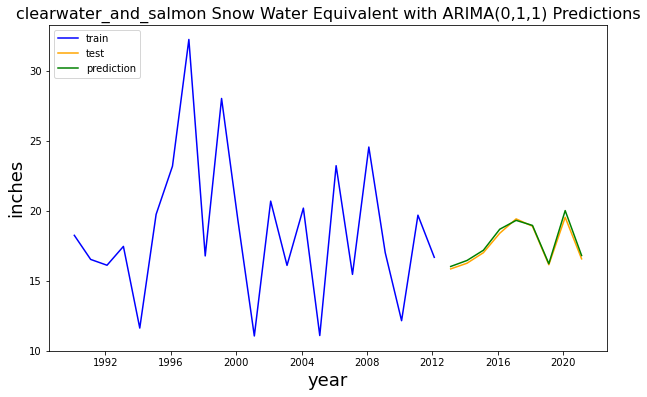

2013-02-10    16.012079
2014-02-10    16.440520
2015-02-10    17.169712
2016-02-10    18.669716
2017-02-10    19.302750
2018-02-10    18.942129
2019-02-10    16.207609
2020-02-10    20.001510
2021-02-10    16.794409
Freq: <DateOffset: years=1>, Name: predicted_mean, dtype: float64
2013-02-10    16.012079
2014-02-10    16.440520
2015-02-10    17.169712
2016-02-10    18.669716
2017-02-10    19.302750
2018-02-10    18.942129
2019-02-10    16.207609
2020-02-10    20.001510
2021-02-10    16.794409
Freq: <DateOffset: years=1>, Name: predicted_mean, dtype: float64
MODEL FINISHED!
Our model that minimizes AIC on columbia_above_methow's training data is the ARIMA(3,4,4).
This model has an AIC of 16.0.
  


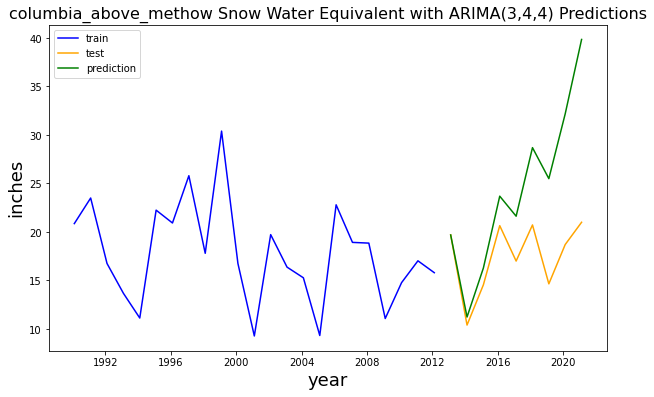

2013-02-10    19.686572
2014-02-10    11.228652
2015-02-10    16.282754
2016-02-10    23.690193
2017-02-10    21.625219
2018-02-10    28.694174
2019-02-10    25.497364
2020-02-10    32.173309
2021-02-10    39.848374
Freq: <DateOffset: years=1>, Name: predicted_mean, dtype: float64
2013-02-10    19.686572
2014-02-10    11.228652
2015-02-10    16.282754
2016-02-10    23.690193
2017-02-10    21.625219
2018-02-10    28.694174
2019-02-10    25.497364
2020-02-10    32.173309
2021-02-10    39.848374
Freq: <DateOffset: years=1>, Name: predicted_mean, dtype: float64


In [ ]:
for key in basins_dict:
    future_preds(key)